In [1]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

In [7]:
def _spline_window(window_size, power=2):
    """
    Squared spline (power=2) window function:
    https://www.wolframalpha.com/input/?i=y%3Dx**2,+y%3D-(x-2)**2+%2B2,+y%3D(x-4)**2,+from+y+%3D+0+to+2
    """
    intersection = int(window_size/4)
    wind_outer = (abs(2*(scipy.signal.triang(window_size))) ** power)/2
    wind_outer[intersection:-intersection] = 0

    wind_inner = 1 - (abs(2*(scipy.signal.triang(window_size) - 1)) ** power)/2
    wind_inner[:intersection] = 0
    wind_inner[-intersection:] = 0

    wind = wind_inner + wind_outer
    wind = wind / np.average(wind)
    wind = np.expand_dims(np.expand_dims(wind, 1), 2)
    wind = wind * wind.transpose(1, 0, 2)
    return wind

In [15]:
wind = _spline_window(window_size=5000, power=2)
print(wind.shape)

(5000, 5000, 1)


In [16]:
#wind = np.expand_dims(np.expand_dims(_2d_spline, 3), 3)
#print(wind.shape)
#wind = wind * wind.transpose(1, 0, 2)
#print(wind.shape)

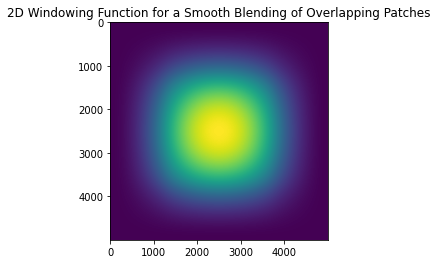

In [17]:
plt.imshow(wind[:, :, 0], cmap="viridis")
plt.title("2D Windowing Function for a Smooth Blending of "
          "Overlapping Patches")
plt.show()